In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os
import json
import pickle
import mmcv
import utils
import numpy as np
import pandas as pd
import evaluation
import detection
import datasets
import visualization

In [2]:
name = "cm_rcnn_10164_exp"
filename = "eval_result.pkl"
cfg = './cfg/cm_rcnn_10164.py'
chp = '../work_dirs/cm_rcnn_10164_exp/latest.pth'
output = '../detection/cm_rcnn_10164_exp/eval_result.json'
root = '../detection/cm_rcnn_10164_exp'
log_path = "../work_dirs/cm_rcnn_10164_exp/20190426_094123.log"

load_type = "test"
coco_types = ["bbox", "segm"]
voc_types = "bbox"
thresh = [0.5, 0.75, 0.9]

In [3]:
coco_dataset, concrete = datasets.load_dataset(cfg, load_type)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Preparing dataset ......
[Dataset is ready now !]


In [4]:
data, _, _, _ = evaluation.detect_and_coco_eval(cfg, chp, filename, eval_type=coco_types,
                                                name=name, params=None)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 280/280, 9.2 task/s, elapsed: 30s, ETA:     0scm_rcnn_10164_exp detection datasets done!

Writing detected results to ../detection/cm_rcnn_10164_exp/eval_result.pkl
......
Writing done to pkl file: ../detection/cm_rcnn_10164_exp/eval_result.pkl

Writing formatted results to ../detection/cm_rcnn_10164_exp/eval_result.json
......
Writing done to json file: ../detection/cm_rcnn_10164_exp/eval_result.json

Starting evaluate bbox and segm ......
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.10s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.766
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.968
 Average Precision  (AP) @[ IoU=0.75      | are

In [5]:
gt, gt_num, det, det_num, class_id = evaluation.voc_ap_prepare(coco_dataset, image_ids=None,
                                                               class_names=None,
                                                               limit=None, types=voc_types, save=True)

targets = utils.voc_ap_compute(coco_dataset, class_id, gt, det, load=False,
                               class_names=None, types=voc_types, threshold=thresh)

Ready to formatting on *bbox* ...
[Building voc style GTS file......]
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 280/280, 75.3 task/s, elapsed: 4s, ETA:     0s
voc groundtruth file building done!
Gt(gt numbers: [289])file saved done in ../detection/cm_rcnn_10164_exp/bbox_gts.pkl

[Building voc style DETS file......]
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 306/306, 2134.9 task/s, elapsed: 0s, ETA:     0s
voc detection file building done!
Det(det numbers: [306])file saved done in ../detection/cm_rcnn_10164_exp/bbox_dets.pkl
Ready to evaluate on *bbox* ...

TP: (3, 306)
FP: (3, 306)
FPR: (3, 306)
TPR: (3, 306)
AREA: [0.97124555 0.85500213 0.81819348] (3,)
AP [0.96973804 0.87486067 0.44427462] (3,)
voc formatted file save done![../detection/cm_rcnn_10164_exp/voc_bbox_0.5_0.75_0.9.pkl]


(3, 308) <class 'numpy.ndarray'>
(3, 308) <class 'numpy.ndarray'>
(3,) <class 'numpy.ndarray'>
(3, 308) <class 'numpy.ndarray'>
(3, 308) <class 'numpy.ndarray'>
(3,) <class 'numpy.ndarray'>

Multiple pr lines
Save done![../detection/cm_rcnn_10164_exp/bbox_pr.png]


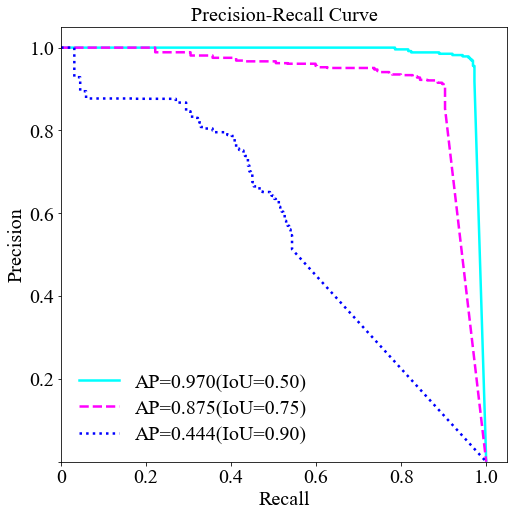


Multiple roc lines
Save done![../detection/cm_rcnn_10164_exp/bbox_roc.png]


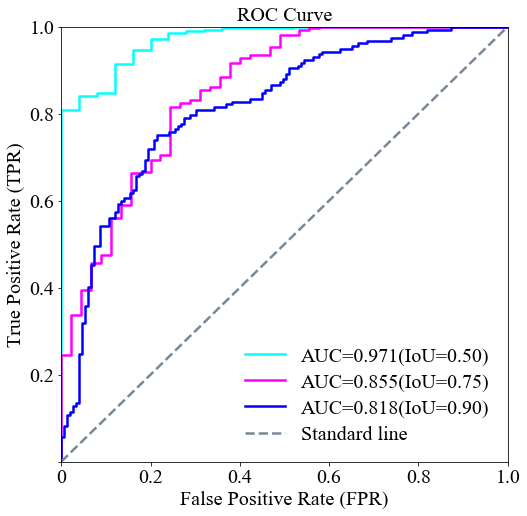

In [6]:
save = True

visualization.plot_voc_curve(targets, "crack", thresh, save=save, name=voc_types, root=root)

In [7]:
voc_types = "segm"

gt, gt_num, det, det_num, class_id = evaluation.voc_ap_prepare(coco_dataset, image_ids=None,
                                                               class_names=None,
                                                               limit=None, types=voc_types, save=True)

targets = utils.voc_ap_compute(coco_dataset, class_id, gt, det, load=False,
                               class_names=None, types=voc_types, threshold=thresh)

Ready to formatting on *segm* ...
[Building voc style GTS file......]
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 280/280, 73.7 task/s, elapsed: 4s, ETA:     0s
voc groundtruth file building done!
Gt(gt numbers: [289])file saved done in ../detection/cm_rcnn_10164_exp/segm_gts.pkl

[Building voc style DETS file......]
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 306/306, 975.3 task/s, elapsed: 0s, ETA:     0s
voc detection file building done!
Det(det numbers: [306])file saved done in ../detection/cm_rcnn_10164_exp/segm_dets.pkl
Ready to evaluate on *segm* ...

TP: (3, 306)
FP: (3, 306)
FPR: (3, 306)
TPR: (3, 306)
AREA: [0.80380294 0.59829973 0.54358399] (3,)
AP [0.88600762 0.3160454  0.00182558] (3,)
voc formatted file save done![../detection/cm_rcnn_10164_exp/voc_segm_0.5_0.75_0.9.pkl]


(3, 308) <class 'numpy.ndarray'>
(3, 308) <class 'numpy.ndarray'>
(3,) <class 'numpy.ndarray'>
(3, 308) <class 'numpy.ndarray'>
(3, 308) <class 'numpy.ndarray'>
(3,) <class 'numpy.ndarray'>

Multiple pr lines
Save done![../detection/cm_rcnn_10164_exp/segm_pr.png]


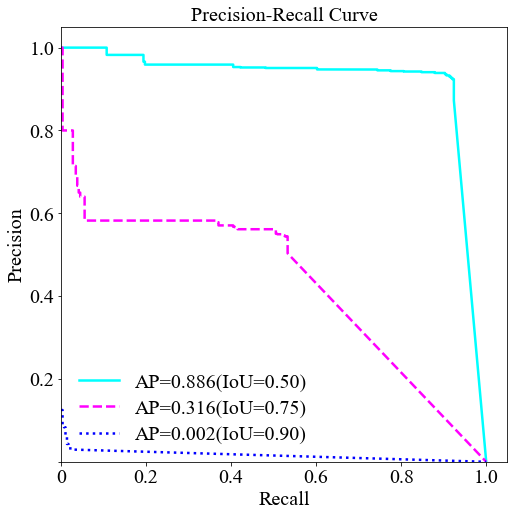


Multiple roc lines
Save done![../detection/cm_rcnn_10164_exp/segm_roc.png]


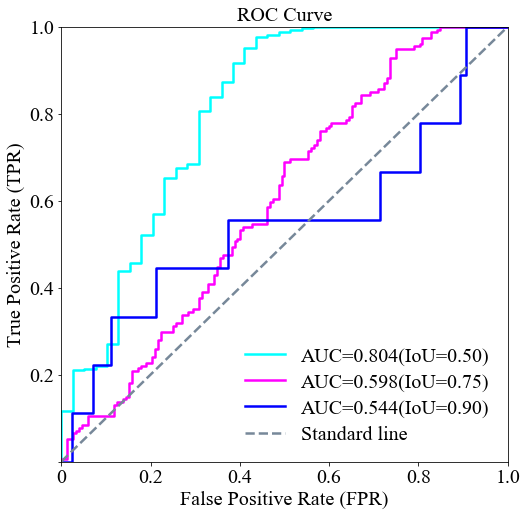

In [8]:
save = True

visualization.plot_voc_curve(targets, "crack", thresh, save=save, name=voc_types, root=root)

In [4]:
training = visualization.read_log(log_path)

In [5]:
training

{'name': 'cm_rcnn_10164_exp',
 'epochs': 12,
 'iters': 700,
 'loss': [1.3306,
  0.7882,
  0.756,
  0.6437,
  0.7233,
  0.7441,
  0.581,
  0.6411,
  0.5481,
  0.6171,
  0.6311,
  0.5522,
  0.5723,
  0.5318,
  0.5679,
  0.5377,
  0.5142,
  0.5343,
  0.572,
  0.6242,
  0.5327,
  0.514,
  0.5642,
  0.5227,
  0.5538,
  0.4859,
  0.5273,
  0.4998,
  0.5204,
  0.4865,
  0.5241,
  0.5124,
  0.4723,
  0.5011,
  0.4884,
  0.4748,
  0.4797,
  0.4886,
  0.4792,
  0.4612,
  0.4921,
  0.482,
  0.4577,
  0.4577,
  0.4657,
  0.4578,
  0.4383,
  0.4909,
  0.5209,
  0.4444,
  0.4293,
  0.453,
  0.4389,
  0.4575,
  0.455,
  0.4085,
  0.448,
  0.4016,
  0.414,
  0.3994,
  0.3678,
  0.3931,
  0.4163,
  0.3762,
  0.3632,
  0.3989,
  0.3906,
  0.3769,
  0.3728,
  0.3759,
  0.3352,
  0.3474,
  0.3652,
  0.3734,
  0.3795,
  0.3777,
  0.3547,
  0.3515,
  0.3186,
  0.3455,
  0.3296,
  0.3617,
  0.3396,
  0.3326],
 'lr': [0.001,
  0.00117,
  0.00133,
  0.0015,
  0.00166,
  0.00183,
  0.002,
  0.00195,
  0.0021,
 

 Save done![../detection/cm_rcnn_10164_exp/learning_curve.png]


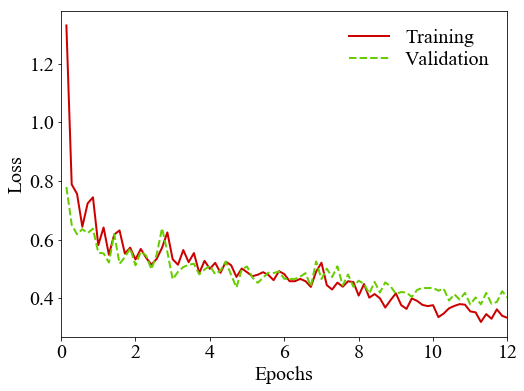

In [7]:
save_1 = True
path_1 = "../detection/cm_rcnn_10164_exp/learning_curve.png"

visualization.plot_training_curve(training, plot="loss", save=save_1, save_path=path_1)

 Save done![../detection/cm_rcnn_10164_exp/learing_rate.png]


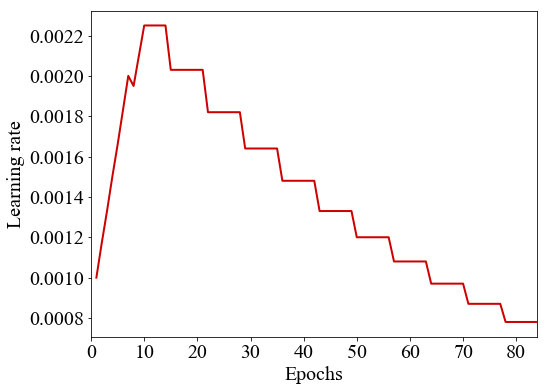

In [14]:
save_2 = True
path_2 = "../detection/cm_rcnn_10164_exp/learing_rate.png"

visualization.plot_training_curve(training, plot="lr", save=save_2, save_path=path_2)